In [1]:
#importing the necessary libraries
import keras
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.activations import relu, tanh, sigmoid, softmax
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
#getting the mnist dataset
(x_train,_),(_,_) = mnist.load_data()
x_train = x_train/255
x_train = x_train.reshape(x_train.shape[0], 784)
print(x_train.shape)

(60000, 784)


In [3]:
#defining the generator
def build_generator():
    generator = Sequential()
    
    generator.add(Dense(512, input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(256))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(784, activation = "tanh"))
    generator.compile(Adam(lr = 0.0002, beta_1 =0.5), loss = "binary_crossentropy")
    
    return generator

#defining the discriminator
def build_discriminator():
    discriminator = Sequential()
    
    discriminator.add(Dense(1024, input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation = "sigmoid"))
    
    discriminator.compile(Adam(lr = 0.0002, beta_1 =0.5), loss = "binary_crossentropy")
    
    return discriminator

#defining the gan network
def build_gan(generator, discriminator):   
    discriminator.trainable = False
    inp = Input(shape = (100,))
    gan_inp = generator(inp)
    gan_out = discriminator(gan_inp)

    gan = Model(inputs = inp, outputs = gan_out)    
    gan.compile(Adam(lr = 0.0002, beta_1 =0.5), loss = "binary_crossentropy")
    return gan


In [4]:
#plotting the necessary images
def plot_images(generator, epoch, dimsize = (10,10), figsize = (10,10), batch_size = 100):
    noise = np.random.normal(0,1,[batch_size, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(generated_images.shape[0], 28, 28)
    plt.figure(figsize = figsize)
    for i in range(batch_size):
        plt.subplot(dimsize[0], dimsize[1], i+1)
        plt.imshow(generated_images[i], interpolation="nearest")
        plt.axis("off")
    plt.tight_layout()
    plt.savefig("gan_generated_epoch_{}.png".format(epoch))

Instructions for updating:
Colocations handled automatically by placer.
##### @ Epoch 1/400


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.71it/s]


##### @ Epoch 2/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.59it/s]


##### @ Epoch 3/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.94it/s]


##### @ Epoch 4/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.58it/s]


##### @ Epoch 5/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.20it/s]


##### @ Epoch 6/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.20it/s]


##### @ Epoch 7/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.30it/s]


##### @ Epoch 8/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.11it/s]


##### @ Epoch 9/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.74it/s]


##### @ Epoch 10/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.32it/s]


##### @ Epoch 11/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.45it/s]


##### @ Epoch 12/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.04it/s]


##### @ Epoch 13/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.03it/s]


##### @ Epoch 14/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.54it/s]


##### @ Epoch 15/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.93it/s]


##### @ Epoch 16/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.56it/s]


##### @ Epoch 17/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.04it/s]


##### @ Epoch 18/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.70it/s]


##### @ Epoch 19/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.82it/s]


##### @ Epoch 20/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.66it/s]


##### @ Epoch 21/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.72it/s]


##### @ Epoch 22/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 68.58it/s]


##### @ Epoch 23/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.31it/s]


##### @ Epoch 24/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.08it/s]


##### @ Epoch 25/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.08it/s]


##### @ Epoch 26/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.73it/s]


##### @ Epoch 27/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.67it/s]


##### @ Epoch 28/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.38it/s]


##### @ Epoch 29/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.53it/s]


##### @ Epoch 30/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.26it/s]


##### @ Epoch 31/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.85it/s]


##### @ Epoch 32/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.81it/s]


##### @ Epoch 33/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.71it/s]


##### @ Epoch 34/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.24it/s]


##### @ Epoch 35/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.18it/s]


##### @ Epoch 36/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.81it/s]


##### @ Epoch 37/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.04it/s]


##### @ Epoch 38/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.36it/s]


##### @ Epoch 39/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 24.71it/s]


##### @ Epoch 40/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.08it/s]


##### @ Epoch 41/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.06it/s]


##### @ Epoch 42/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.51it/s]


##### @ Epoch 43/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.21it/s]


##### @ Epoch 44/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.60it/s]


##### @ Epoch 45/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.97it/s]


##### @ Epoch 46/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.46it/s]


##### @ Epoch 47/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.08it/s]


##### @ Epoch 48/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.60it/s]


##### @ Epoch 49/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.86it/s]


##### @ Epoch 50/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.82it/s]


##### @ Epoch 51/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.42it/s]


##### @ Epoch 52/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.23it/s]


##### @ Epoch 53/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.97it/s]


##### @ Epoch 54/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.12it/s]


##### @ Epoch 55/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.41it/s]


##### @ Epoch 56/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.73it/s]


##### @ Epoch 57/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.81it/s]


##### @ Epoch 58/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.39it/s]


##### @ Epoch 59/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.60it/s]


##### @ Epoch 60/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.33it/s]


##### @ Epoch 61/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.38it/s]


##### @ Epoch 62/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.78it/s]


##### @ Epoch 63/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.27it/s]


##### @ Epoch 64/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.14it/s]


##### @ Epoch 65/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.76it/s]


##### @ Epoch 66/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.13it/s]


##### @ Epoch 67/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.65it/s]


##### @ Epoch 68/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.30it/s]


##### @ Epoch 69/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.16it/s]


##### @ Epoch 70/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.91it/s]


##### @ Epoch 71/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.02it/s]


##### @ Epoch 72/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.69it/s]


##### @ Epoch 73/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.51it/s]


##### @ Epoch 74/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.78it/s]


##### @ Epoch 75/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.86it/s]


##### @ Epoch 76/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.85it/s]


##### @ Epoch 77/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


##### @ Epoch 78/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.34it/s]


##### @ Epoch 79/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.64it/s]


##### @ Epoch 80/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.15it/s]


##### @ Epoch 81/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.69it/s]


##### @ Epoch 82/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.49it/s]


##### @ Epoch 83/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.83it/s]


##### @ Epoch 84/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.11it/s]


##### @ Epoch 85/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.12it/s]


##### @ Epoch 86/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.95it/s]


##### @ Epoch 87/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.61it/s]


##### @ Epoch 88/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.54it/s]


##### @ Epoch 89/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.12it/s]


##### @ Epoch 90/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.79it/s]


##### @ Epoch 91/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.23it/s]


##### @ Epoch 92/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.77it/s]


##### @ Epoch 93/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.45it/s]


##### @ Epoch 94/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.48it/s]


##### @ Epoch 95/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.27it/s]


##### @ Epoch 96/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.10it/s]


##### @ Epoch 97/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.79it/s]


##### @ Epoch 98/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.40it/s]


##### @ Epoch 99/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.11it/s]


##### @ Epoch 100/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.71it/s]


##### @ Epoch 101/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.12it/s]


##### @ Epoch 102/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.14it/s]


##### @ Epoch 103/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.42it/s]


##### @ Epoch 104/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.61it/s]


##### @ Epoch 105/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.12it/s]


##### @ Epoch 106/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.18it/s]


##### @ Epoch 107/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.06it/s]


##### @ Epoch 108/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.67it/s]


##### @ Epoch 109/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.21it/s]


##### @ Epoch 110/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.73it/s]


##### @ Epoch 111/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.71it/s]


##### @ Epoch 112/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.87it/s]


##### @ Epoch 113/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.23it/s]


##### @ Epoch 114/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.85it/s]


##### @ Epoch 115/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.43it/s]


##### @ Epoch 116/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.03it/s]


##### @ Epoch 117/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.88it/s]


##### @ Epoch 118/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.43it/s]


##### @ Epoch 119/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.23it/s]


##### @ Epoch 120/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.78it/s]


##### @ Epoch 121/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.40it/s]


##### @ Epoch 122/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.09it/s]


##### @ Epoch 123/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.86it/s]


##### @ Epoch 124/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.55it/s]


##### @ Epoch 125/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.10it/s]


##### @ Epoch 126/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.90it/s]


##### @ Epoch 127/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.08it/s]


##### @ Epoch 128/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.80it/s]


##### @ Epoch 129/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.01it/s]


##### @ Epoch 130/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.57it/s]


##### @ Epoch 131/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.77it/s]


##### @ Epoch 132/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.05it/s]


##### @ Epoch 133/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.71it/s]


##### @ Epoch 134/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.23it/s]


##### @ Epoch 135/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.67it/s]


##### @ Epoch 136/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.48it/s]


##### @ Epoch 137/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.58it/s]


##### @ Epoch 138/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.09it/s]


##### @ Epoch 139/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.77it/s]


##### @ Epoch 140/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.39it/s]


##### @ Epoch 141/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.62it/s]


##### @ Epoch 142/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.02it/s]


##### @ Epoch 143/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.33it/s]


##### @ Epoch 144/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.64it/s]


##### @ Epoch 145/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.45it/s]


##### @ Epoch 146/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.88it/s]


##### @ Epoch 147/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.78it/s]


##### @ Epoch 148/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.18it/s]


##### @ Epoch 149/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.13it/s]


##### @ Epoch 150/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.41it/s]


##### @ Epoch 151/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.59it/s]


##### @ Epoch 152/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.18it/s]


##### @ Epoch 153/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.50it/s]


##### @ Epoch 154/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.11it/s]


##### @ Epoch 155/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.34it/s]


##### @ Epoch 156/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.41it/s]


##### @ Epoch 157/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.30it/s]


##### @ Epoch 158/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.66it/s]


##### @ Epoch 159/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.00it/s]


##### @ Epoch 160/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.84it/s]


##### @ Epoch 161/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.37it/s]


##### @ Epoch 162/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.79it/s]


##### @ Epoch 163/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.96it/s]


##### @ Epoch 164/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.12it/s]


##### @ Epoch 165/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.19it/s]


##### @ Epoch 166/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.71it/s]


##### @ Epoch 167/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.71it/s]


##### @ Epoch 168/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.18it/s]


##### @ Epoch 169/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.61it/s]


##### @ Epoch 170/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.75it/s]


##### @ Epoch 171/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.97it/s]


##### @ Epoch 172/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.34it/s]


##### @ Epoch 173/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.30it/s]


##### @ Epoch 174/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.85it/s]


##### @ Epoch 175/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.35it/s]


##### @ Epoch 176/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.92it/s]


##### @ Epoch 177/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.87it/s]


##### @ Epoch 178/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.16it/s]


##### @ Epoch 179/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.82it/s]


##### @ Epoch 180/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.91it/s]


##### @ Epoch 181/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.86it/s]


##### @ Epoch 182/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.55it/s]


##### @ Epoch 183/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.61it/s]


##### @ Epoch 184/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.68it/s]


##### @ Epoch 185/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.11it/s]


##### @ Epoch 186/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.28it/s]


##### @ Epoch 187/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.44it/s]


##### @ Epoch 188/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.15it/s]


##### @ Epoch 189/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.22it/s]


##### @ Epoch 190/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.75it/s]


##### @ Epoch 191/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.51it/s]


##### @ Epoch 192/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.70it/s]


##### @ Epoch 193/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.20it/s]


##### @ Epoch 194/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.81it/s]


##### @ Epoch 195/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.56it/s]


##### @ Epoch 196/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.79it/s]


##### @ Epoch 197/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.22it/s]


##### @ Epoch 198/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.62it/s]


##### @ Epoch 199/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.52it/s]


##### @ Epoch 200/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.81it/s]


##### @ Epoch 201/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.35it/s]


##### @ Epoch 202/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.61it/s]


##### @ Epoch 203/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.00it/s]


##### @ Epoch 204/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.58it/s]


##### @ Epoch 205/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.73it/s]


##### @ Epoch 206/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.82it/s]


##### @ Epoch 207/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.34it/s]


##### @ Epoch 208/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.69it/s]


##### @ Epoch 209/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.47it/s]


##### @ Epoch 210/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.40it/s]


##### @ Epoch 211/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.58it/s]


##### @ Epoch 212/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.44it/s]


##### @ Epoch 213/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.60it/s]


##### @ Epoch 214/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.56it/s]


##### @ Epoch 215/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.33it/s]


##### @ Epoch 216/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.42it/s]


##### @ Epoch 217/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.72it/s]


##### @ Epoch 218/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.02it/s]


##### @ Epoch 219/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.30it/s]


##### @ Epoch 220/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.72it/s]


##### @ Epoch 221/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.35it/s]


##### @ Epoch 222/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.28it/s]


##### @ Epoch 223/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


##### @ Epoch 224/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.90it/s]


##### @ Epoch 225/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.41it/s]


##### @ Epoch 226/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.73it/s]


##### @ Epoch 227/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.88it/s]


##### @ Epoch 228/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.59it/s]


##### @ Epoch 229/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.87it/s]


##### @ Epoch 230/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.32it/s]


##### @ Epoch 231/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.46it/s]


##### @ Epoch 232/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.53it/s]


##### @ Epoch 233/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.22it/s]


##### @ Epoch 234/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.56it/s]


##### @ Epoch 235/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.24it/s]


##### @ Epoch 236/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.01it/s]


##### @ Epoch 237/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.59it/s]


##### @ Epoch 238/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.25it/s]


##### @ Epoch 239/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.99it/s]


##### @ Epoch 240/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.85it/s]


##### @ Epoch 241/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.54it/s]


##### @ Epoch 242/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.51it/s]


##### @ Epoch 243/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.72it/s]


##### @ Epoch 244/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.77it/s]


##### @ Epoch 245/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.32it/s]


##### @ Epoch 246/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.65it/s]


##### @ Epoch 247/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.76it/s]


##### @ Epoch 248/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.52it/s]


##### @ Epoch 249/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.03it/s]


##### @ Epoch 250/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.47it/s]


##### @ Epoch 251/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.19it/s]


##### @ Epoch 252/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.26it/s]


##### @ Epoch 253/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.82it/s]


##### @ Epoch 254/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.70it/s]


##### @ Epoch 255/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.46it/s]


##### @ Epoch 256/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.95it/s]


##### @ Epoch 257/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.21it/s]


##### @ Epoch 258/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.49it/s]


##### @ Epoch 259/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.90it/s]


##### @ Epoch 260/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.93it/s]


##### @ Epoch 261/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.80it/s]


##### @ Epoch 262/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.63it/s]


##### @ Epoch 263/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.08it/s]


##### @ Epoch 264/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.00it/s]


##### @ Epoch 265/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.80it/s]


##### @ Epoch 266/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.45it/s]


##### @ Epoch 267/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.09it/s]


##### @ Epoch 268/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.47it/s]


##### @ Epoch 269/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.92it/s]


##### @ Epoch 270/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.87it/s]


##### @ Epoch 271/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 52.72it/s]


##### @ Epoch 272/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.46it/s]


##### @ Epoch 273/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.91it/s]


##### @ Epoch 274/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.09it/s]


##### @ Epoch 275/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.47it/s]


##### @ Epoch 276/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.05it/s]


##### @ Epoch 277/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.38it/s]


##### @ Epoch 278/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.04it/s]


##### @ Epoch 279/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.27it/s]


##### @ Epoch 280/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.80it/s]


##### @ Epoch 281/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.79it/s]


##### @ Epoch 282/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 64.31it/s]


##### @ Epoch 283/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.12it/s]


##### @ Epoch 284/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.52it/s]


##### @ Epoch 285/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.20it/s]


##### @ Epoch 286/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.94it/s]


##### @ Epoch 287/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.39it/s]


##### @ Epoch 288/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.51it/s]


##### @ Epoch 289/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.22it/s]


##### @ Epoch 290/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.76it/s]


##### @ Epoch 291/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.87it/s]


##### @ Epoch 292/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.66it/s]


##### @ Epoch 293/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.23it/s]


##### @ Epoch 294/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.34it/s]


##### @ Epoch 295/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.58it/s]


##### @ Epoch 296/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.57it/s]


##### @ Epoch 297/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.69it/s]


##### @ Epoch 298/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.15it/s]


##### @ Epoch 299/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.59it/s]


##### @ Epoch 300/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.19it/s]


##### @ Epoch 301/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.10it/s]


##### @ Epoch 302/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.77it/s]


##### @ Epoch 303/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.58it/s]


##### @ Epoch 304/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.01it/s]


##### @ Epoch 305/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.00it/s]


##### @ Epoch 306/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.44it/s]


##### @ Epoch 307/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.44it/s]


##### @ Epoch 308/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.86it/s]


##### @ Epoch 309/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.41it/s]


##### @ Epoch 310/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.22it/s]


##### @ Epoch 311/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.38it/s]


##### @ Epoch 312/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


##### @ Epoch 313/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.49it/s]


##### @ Epoch 314/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.39it/s]


##### @ Epoch 315/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.62it/s]


##### @ Epoch 316/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.41it/s]


##### @ Epoch 317/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.95it/s]


##### @ Epoch 318/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.78it/s]


##### @ Epoch 319/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.96it/s]


##### @ Epoch 320/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.77it/s]


##### @ Epoch 321/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.96it/s]


##### @ Epoch 322/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.58it/s]


##### @ Epoch 323/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.56it/s]


##### @ Epoch 324/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.70it/s]


##### @ Epoch 325/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.43it/s]


##### @ Epoch 326/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.67it/s]


##### @ Epoch 327/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.92it/s]


##### @ Epoch 328/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.99it/s]


##### @ Epoch 329/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.81it/s]


##### @ Epoch 330/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.63it/s]


##### @ Epoch 331/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.14it/s]


##### @ Epoch 332/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.86it/s]


##### @ Epoch 333/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.90it/s]


##### @ Epoch 334/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


##### @ Epoch 335/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.00it/s]


##### @ Epoch 336/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.03it/s]


##### @ Epoch 337/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.05it/s]


##### @ Epoch 338/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.71it/s]


##### @ Epoch 339/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.81it/s]


##### @ Epoch 340/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.24it/s]


##### @ Epoch 341/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.22it/s]


##### @ Epoch 342/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.94it/s]


##### @ Epoch 343/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.10it/s]


##### @ Epoch 344/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.80it/s]


##### @ Epoch 345/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.97it/s]


##### @ Epoch 346/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.96it/s]


##### @ Epoch 347/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.45it/s]


##### @ Epoch 348/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.21it/s]


##### @ Epoch 349/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.41it/s]


##### @ Epoch 350/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.81it/s]


##### @ Epoch 351/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.69it/s]


##### @ Epoch 352/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.17it/s]


##### @ Epoch 353/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.88it/s]


##### @ Epoch 354/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.45it/s]


##### @ Epoch 355/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.13it/s]


##### @ Epoch 356/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.16it/s]


##### @ Epoch 357/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.70it/s]


##### @ Epoch 358/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.41it/s]


##### @ Epoch 359/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.80it/s]


##### @ Epoch 360/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.00it/s]


##### @ Epoch 361/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.27it/s]


##### @ Epoch 362/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.65it/s]


##### @ Epoch 363/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.80it/s]


##### @ Epoch 364/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.08it/s]


##### @ Epoch 365/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.43it/s]


##### @ Epoch 366/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.07it/s]


##### @ Epoch 367/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.73it/s]


##### @ Epoch 368/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.85it/s]


##### @ Epoch 369/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.67it/s]


##### @ Epoch 370/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.95it/s]


##### @ Epoch 371/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.23it/s]


##### @ Epoch 372/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.88it/s]


##### @ Epoch 373/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.75it/s]


##### @ Epoch 374/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.77it/s]


##### @ Epoch 375/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.39it/s]


##### @ Epoch 376/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.92it/s]


##### @ Epoch 377/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.57it/s]


##### @ Epoch 378/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.01it/s]


##### @ Epoch 379/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.32it/s]


##### @ Epoch 380/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.38it/s]


##### @ Epoch 381/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.15it/s]


##### @ Epoch 382/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.35it/s]


##### @ Epoch 383/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.06it/s]


##### @ Epoch 384/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.25it/s]


##### @ Epoch 385/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.93it/s]


##### @ Epoch 386/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.81it/s]


##### @ Epoch 387/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.29it/s]


##### @ Epoch 388/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.16it/s]


##### @ Epoch 389/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.56it/s]


##### @ Epoch 390/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.97it/s]


##### @ Epoch 391/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.54it/s]


##### @ Epoch 392/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.04it/s]


##### @ Epoch 393/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.65it/s]


##### @ Epoch 394/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.30it/s]


##### @ Epoch 395/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.66it/s]


##### @ Epoch 396/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.72it/s]


##### @ Epoch 397/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.11it/s]


##### @ Epoch 398/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.68it/s]


##### @ Epoch 399/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.56it/s]


##### @ Epoch 400/400


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 61.39it/s]


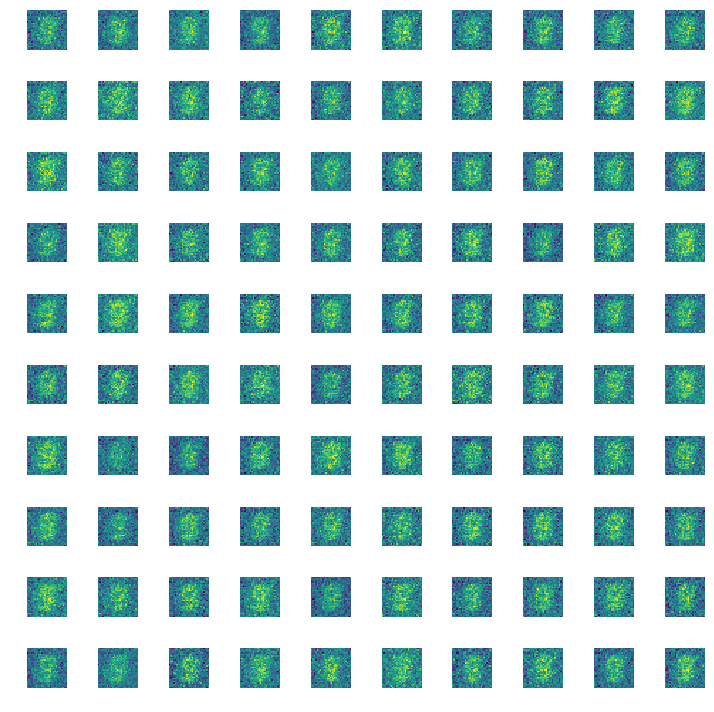

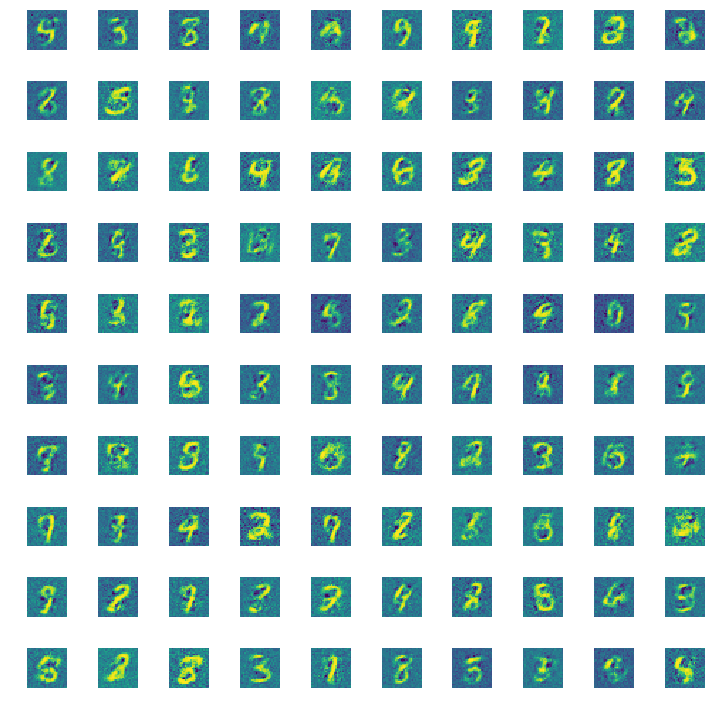

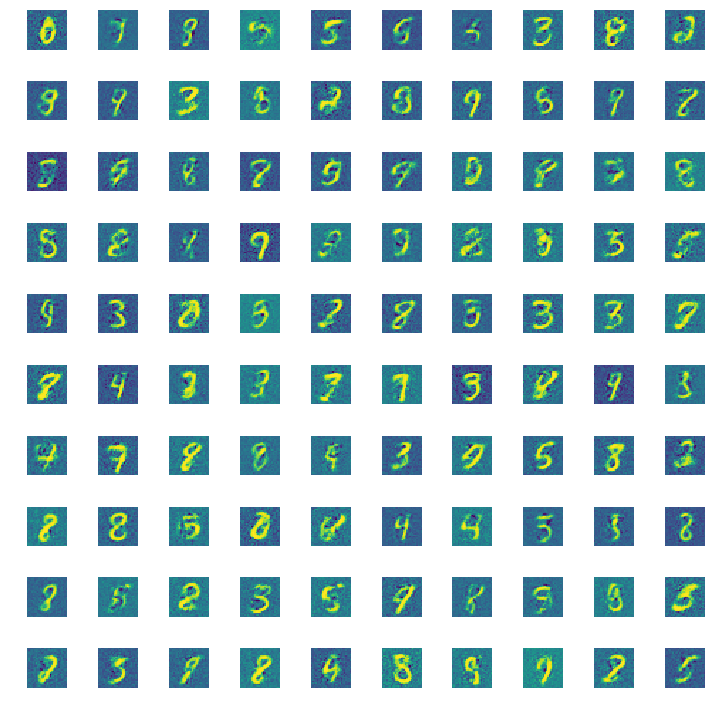

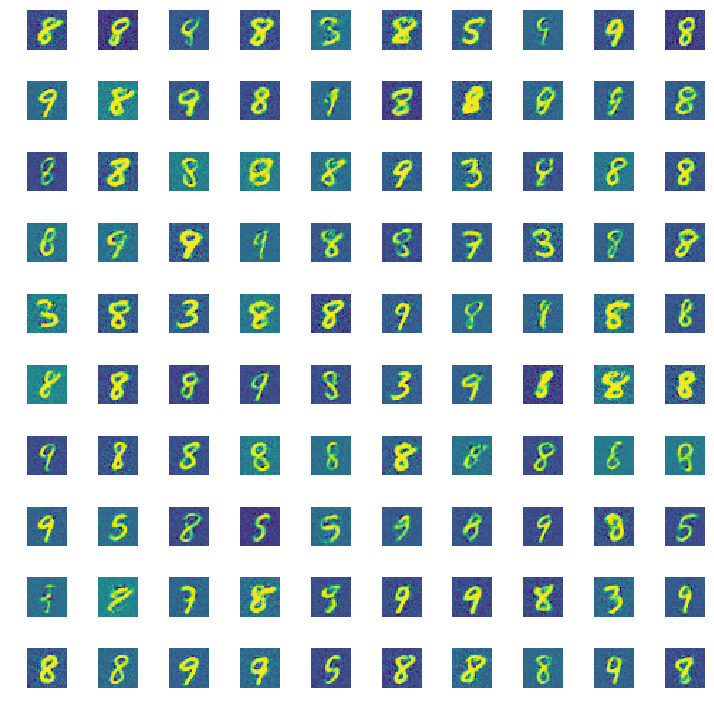

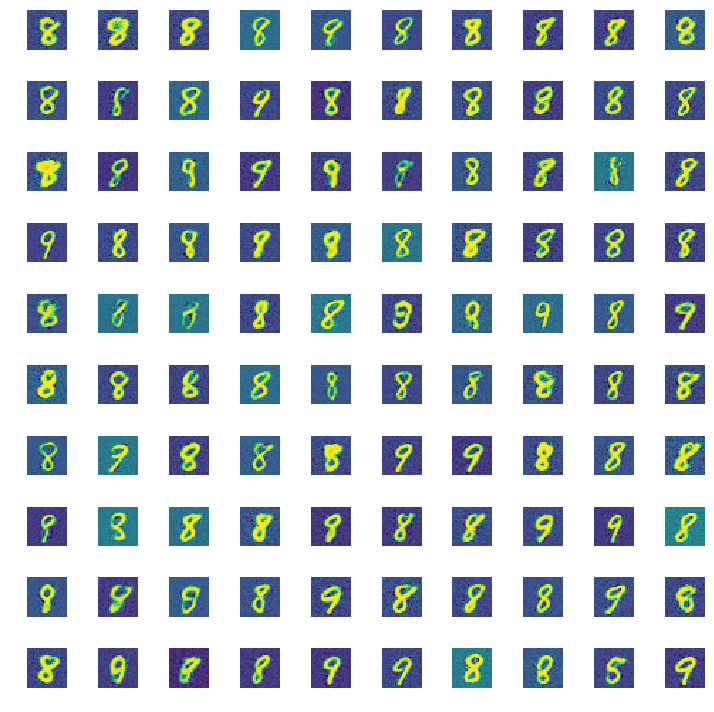

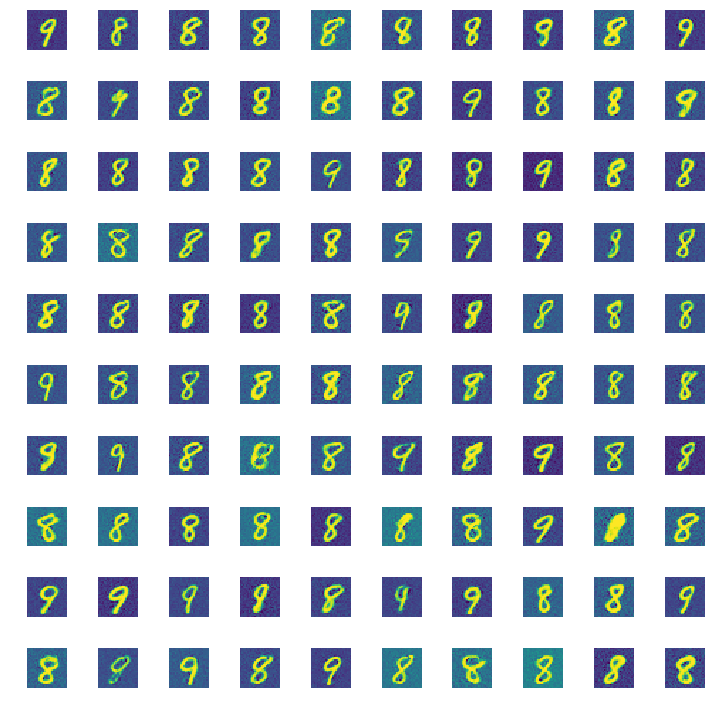

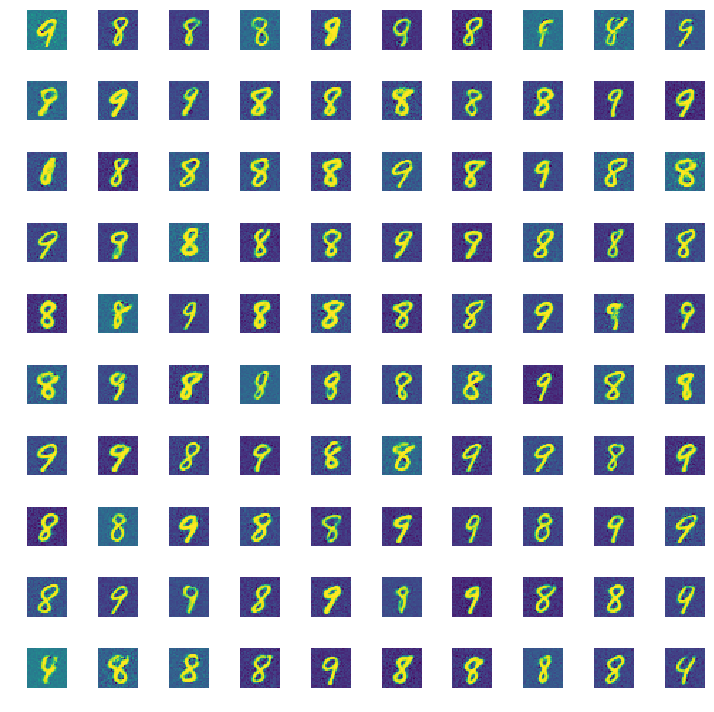

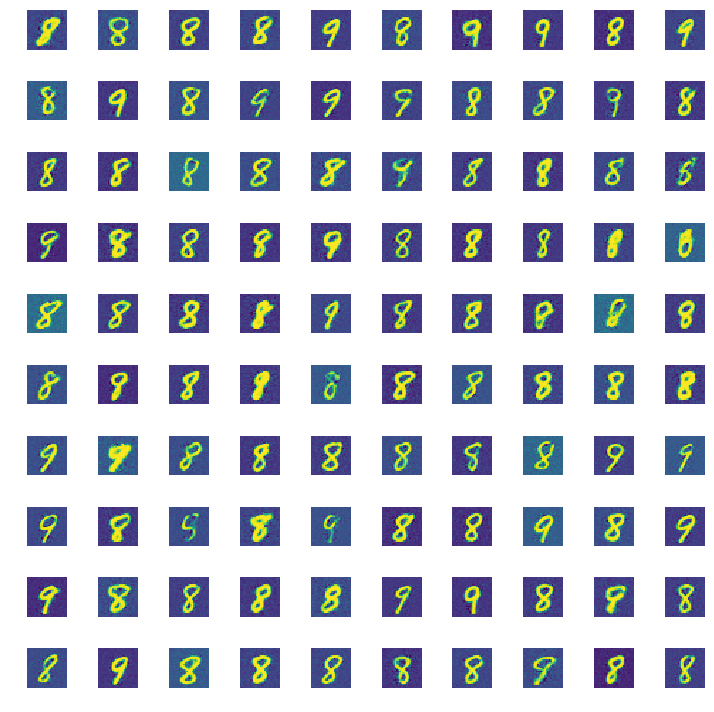

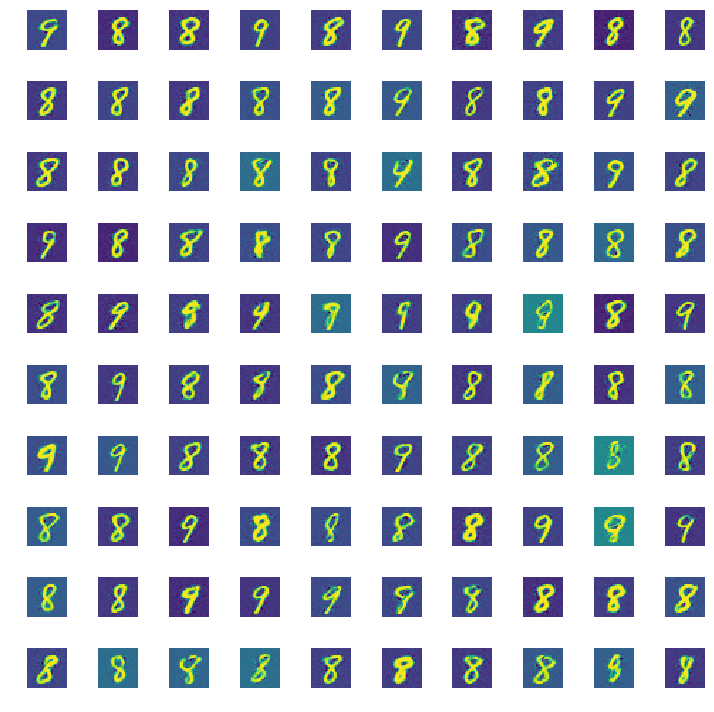

In [5]:
def train_gan(epochs = 400, batch_size = 100):
    batch_count = x_train.shape[0]/batch_size
    
    generator = build_generator()
    discriminator = build_discriminator()
    gan = build_gan(generator, discriminator)
    
    for e in range(1, epochs+1,1):
        print("##### @ Epoch {}/{}".format(e, epochs))
        for _ in tqdm(range(batch_size)):
            image_batch = x_train[np.random.randint(0,x_train.shape[0], size = batch_size)]

            noise = np.random.normal(0,1,[batch_size,100])

            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 0.9

            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            y_gen = np.ones(batch_size)

            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
        if e==1 or e%50 == 0:
            plot_images(generator,e)
train_gan()
        
        
        